# GeoEnrichment

## 1. What is GeoEnrichment

**GeoEnrichment**, also known as _Data Enrichment_, is the process of finding demographic data and local facts for locations around the world. It allows you to gain "location-based" insight about the people and places in an area. The additional information can drive better understanding, analysis, and decision-making. 

![data-enrichment-gif](../_static/images/data-enrichment.gif)

```{admonition} Use Cases

- Create tools or apps to support interactive exploration of any area of interest.
- Automate and simplify the process social, economic, and demographic data retrieval.
- Access more data beyond Census, including _Jobs_, _Behaviors_, _Spending_, _Crime_, and _Health_ data.
```

## 1.1. How to use GeoEnrichment

To perform GeoEnrichment, we need to utilize Esri's [GeoEnrichment service](https://developers.arcgis.com/documentation/mapping-and-location-services/data-enrichment/#api-support). The service provides over **15,000** data variables (data fields) with coverage for more than 150 countries and regions. 

An access token is _required_ to use the service for developers who have an [ArcGIS Location Platform](https://developers.arcgis.com/documentation/glossary/arcgis-location-platform-account/) account or [ArcGIS Online account](https://developers.arcgis.com/documentation/glossary/arcgis-online-account/).

The service can be used with many Esri APIs (Application Programming Interfaces), such as _ArcGIS Maps SDK_ and _ArcGIS REST JS_. Among them, only ArcGIS Python API offers [Full Support](https://developers.arcgis.com/documentation/mapping-and-location-services/data-enrichment/#api-support). It is also how we will access this service in this class.

## 1.2 What data are available

There are two main types of data: **Global Data** and **Local Data**. 

The global (demographic) data, also known as [_standard demographics_](https://doc.arcgis.com/en/esri-demographics/latest/esri-demographics/standard-demographics.htm), covers 170 countries and regions. The data include population, income, age, households, education, spending, jobs, marital status, and key facts. The map below shows coverage of global data.

In [23]:
from IPython.display import IFrame

# Adjust width and height as needed
IFrame(src="../_static/global_data_map.html", width="100%", height="300px")

To see the standard demographics available for each country or region you can review the regional data tables for [Africa](https://doc.arcgis.com/en/esri-demographics/latest/esri-demographics/africa.htm), [Asia](https://doc.arcgis.com/en/esri-demographics/latest/esri-demographics/asia.htm), [Europe](https://doc.arcgis.com/en/esri-demographics/latest/esri-demographics/europe.htm), [North America](https://doc.arcgis.com/en/esri-demographics/latest/esri-demographics/north-america.htm), [Oceania](https://doc.arcgis.com/en/esri-demographics/latest/esri-demographics/oceania.htm), and [South America](https://doc.arcgis.com/en/esri-demographics/latest/esri-demographics/south-america.htm). Within the link for each of the continent, you can also view an individual country or region page to find the current list of variables in the related links section for that country.

The local data, also known as [_advanced demographics_](https://doc.arcgis.com/en/esri-demographics/latest/esri-demographics/advanced-demographics.htm), to get detailed information for specific countries, counties, cities, and locations. Each individual data field is represented by an [analysis variable](https://developers.arcgis.com/documentation/glossary/analysis-variable/), and analysis variables are organized into [data categories](https://doc.arcgis.com/en/esri-demographics/latest/esri-demographics/about-demographic-data-categories.htm). The map below shows coverage of local data.

In [24]:
from IPython.display import IFrame

# Adjust width and height as needed
IFrame(src="../_static/local_data_map.html", width="100%", height="300px")

`````{admonition} Tools to discover data variables
:class: tip

You can explore interactively with the following tools to find data that you are looking for.
- [Analysis Variable Finder](https://developers.arcgis.com/documentation/mapping-and-location-services/data-enrichment/tools/analysis-variable-finder/)
- [Data Collection Finder](https://developers.arcgis.com/documentation/mapping-and-location-services/data-enrichment/tools/data-collection-finder/)

For more details on how to find data variables using ArcGIS API for Python, check out this [tutorial](https://developers.arcgis.com/python/latest/guide/part4-what-to-enrich-datacollections-analysisvariables/).
`````

## 2. User Authentication

You will need [Developer Credentials](https://developers.arcgis.com/documentation/security-and-authentication/introduction/#developer-credentials) to access the GeoEnrichment service. Read more about [Security in ArcGIS](https://developers.arcgis.com/documentation/security-and-authentication/introduction/), including _what is authentication_, _how it works_, and _types of authentication_. We will use [user authentication](https://developers.arcgis.com/documentation/security-and-authentication/user-authentication/), i.e., [**OAuth 2.0**](https://developers.arcgis.com/documentation/security-and-authentication/user-authentication/oauth-credentials-user/), in this class. 

![OAuth2.0](https://developers.arcgis.com/documentation/static/eff00ef04d6a3983d492b1d0d4d13b3e/6aacb/credential-type-oauth.png)

The steps to create OAuth credentials with an ArcGIS Online account are:

1. Sign in to your ArcGIS Online account.
2. Click **Content** > **My content** > **New item** and select **Developer credentials**.
3. Select **OAuth 2.0 credentials** and click **Next**.
4. Add a _Redirect URLs_ (`https://localhost:8080`) and click **Next**.
5. Name the credentials and click **Next** to review. When you are ready to create the credentials, click **Create**.
6. Go to **Settings** on the top right of the item. Under **Application**, click **Register application**.
7. Add the _Redirect URLs_ (`https://localhost:8080`) one more time and click **Register**. Now, you have a developer credential created.

After creating the developer credential, you can view the item, an example showing below. Note there are two important items you need from the item to get access to the service you have chosen, **Client ID** and **Client Secret**.

![developer-credential](https://developers.arcgis.com/documentation/static/4f72ef6c5478874b97b636e07184701f/aa440/oauth-credentials-user.png)

## 3. Global Data Search

Now, you have an authenticated credential to access the service. Let's see how we can use the service in an example. We start with Global Data.

In [1]:
# import GIS module from arcgis api for python

from arcgis.gis import GIS

 Replace the following `client_id` and `client_secret` with the values you copied from your credential. 

In [ ]:
# Authenticate using OAuth 2.0 Client Credentials Flow
gis = GIS(
    client_id="YOUR_CLIENT_ID",
    client_secret="YOUR_CLIENT_SECRET",
    grant_type="client_credentials"
)

```{admonition} Note
The above codes create a `GIS` instance from the ArcGIS API for Python's `GIS` module. This instance essentially provides you access to the service. Why do you think it's called "GIS"?
```

In [2]:
gis = GIS(
    "https://www.arcgis.com",
    api_key="AAPTxy8BH1VEsoebNVZXo8HurOB-qUDlHkp2KVuV5t-oSPzgOJAW_4l29510tXfyfc1t824hpXUV0wt10ADu6sx_dP5RYNRkFrgXnccW-Zgmk1cAeHycdlf9FJgz3nDSpkdeN-uSLrfHQEnsTUGRedftU1CoXaBDMTRG9nu-gqHTgKYvViqJ0XnG14KHZU5D9qRnr9qQ6gLOt00NGUq1kSAcaWOuCCXIjsfysO_tfHf6XLE.AT1_KHcekbw4"
)

Now, let's define an area for GeoEnrichment. We can do that by defining a point and create a buffer around it.

In [3]:
# import Point object from the geometry module
from arcgis.geometry import Point

pt = Point({
    "x": -81.639771, 
    "y": 30.338587, 
    "spatialReference": {"wkid":4326}
})

It would be nice if we can see it in the map. The following code can help us do that.

In [4]:
map = gis.map()

# set up the map's layout
map.layout.height = "300px"
map.layout.display = "flex"
map.layout.flex_flow = "column"

In [5]:
map.content.draw(pt)  # draw the point

In [7]:
# set the center, zoom, and basemap
map.basemap.basemap = "arcgis-navigation"
map.center = [pt.y, pt.x]
map.zoom = 12
map

Map(center=[30.338587, -81.639771], extent={'spatialReference': {'wkid': 102100}, 'xmin': -36591934.18067003, …

In [10]:
# cannot run in build

map.export_to_html("../_static/map.html")

True

In [ ]:
from IPython.display import IFrame

# Adjust width and height as needed
IFrame(src="../_static/map.html", width="100%", height="300px")

In [17]:
import pandas as pd
from arcgis.geoenrichment import BufferStudyArea, enrich

buffered = BufferStudyArea(area=pt, radii=[1], units='Miles')  # 1 mile

#enrich using keyglobalfacts data collection
result_data_frame = enrich(
    study_areas=[buffered], 
    data_collections=['KeyGlobalFacts'],
    return_geometry=False  # skip returning geometry
)

result_data_frame

source_country   area_type buffer_units buffer_units_alias  buffer_radii  \
0            USA  RingBuffer        Miles              Miles             1   

                                  aggregation_method  \
0  BlockApportionment:US.BlockGroups;PointsLayer:...   

   population_to_polygon_size_rating  apportionment_confidence  has_data  \
0                              2.191                     2.576         1   

   totpop  tothh  avghhsz  totmales  totfemales  
0    8787   3866     1.99      4777        4010

In [18]:
# multiple rings 1, 2, 5

buffered = BufferStudyArea(area=pt, radii=[1, 2, 5], units='Miles') 

#enrich using keyglobalfacts data collection
enrich(
    study_areas=[buffered], 
    data_collections=['KeyGlobalFacts'],
    return_geometry=False
)


source_country   area_type buffer_units buffer_units_alias  buffer_radii  \
0            USA  RingBuffer        Miles              Miles             1   
1            USA  RingBuffer        Miles              Miles             2   
2            USA  RingBuffer        Miles              Miles             5   

                                  aggregation_method  \
0  BlockApportionment:US.BlockGroups;PointsLayer:...   
1  BlockApportionment:US.BlockGroups;PointsLayer:...   
2  BlockApportionment:US.BlockGroups;PointsLayer:...   

   population_to_polygon_size_rating  apportionment_confidence  has_data  \
0                              2.191                     2.576         1   
1                              2.191                     2.576         1   
2                              2.191                     2.576         1   

   totpop  tothh  avghhsz  totmales  totfemales  
0    8787   3866     1.99      4777        4010  
1   26765  11167     2.04     14411       12354  
2  225259  93199     2.32    110827      114432

## 4. Local Data Search

In GeoEnrichment, the availability of [Local data](#what-data-are-available) varies country by country. Let's look at what data categories are availabile in the United States.

In [19]:
from arcgis.geoenrichment import Country

In [68]:
usa_data = Country("usa", gis)

usa_df = usa_data.data_collections
print(f"{len(usa_df)} variables available in usa_data.")
usa_df.head()

20972 variables available in usa_data.


analysisVariable                   alias  \
dataCollectionID                                                    
1yearincrements   1yearincrements.AGE0_CY  2024 Population Age <1   
1yearincrements   1yearincrements.AGE1_CY   2024 Population Age 1   
1yearincrements   1yearincrements.AGE2_CY   2024 Population Age 2   
1yearincrements   1yearincrements.AGE3_CY   2024 Population Age 3   
1yearincrements   1yearincrements.AGE4_CY   2024 Population Age 4   

                                       fieldCategory vintage  
dataCollectionID                                              
1yearincrements   2024 Age: 1 Year Increments (Esri)    2024  
1yearincrements   2024 Age: 1 Year Increments (Esri)    2024  
1yearincrements   2024 Age: 1 Year Increments (Esri)    2024  
1yearincrements   2024 Age: 1 Year Increments (Esri)    2024  
1yearincrements   2024 Age: 1 Year Increments (Esri)    2024

In [66]:
# data categories 
usa_df["fieldCategory"].value_counts()

fieldCategory
2020 Age by Sex by Race (U.S. Census)                584
2010 Age by Sex by Race (U.S. Census)                544
2024 Psychographics & Shopping (Market Potential)    484
2024 Age by Sex by Race (Esri)                       480
2029 Age by Sex by Race (Esri)                       480
                                                    ... 
2024 Population (Esri)                                 2
Age: 5 Year Increments                                 2
2018-2022 Households by Vehicles Available (ACS)       1
2018-2022 Household Income (ACS)                       1
2024 Labor Force by Industry (Esri)                    1
Name: count, Length: 215, dtype: int64

To see what variables related to **Population**, for example, we can query against the `alias` column using the following code.

In [78]:
# run a boolean indexing to filter alias containing "population"
contains_pop = usa_df['alias'].str.contains(
    'population', case=False, na=False
)
print(f"{contains_pop.sum()} population-related variables available in usa_data.")
usa_df.loc[contains_pop].head()

644 population-related variables available in usa_data.


analysisVariable                   alias  \
dataCollectionID                                                    
1yearincrements   1yearincrements.AGE0_CY  2024 Population Age <1   
1yearincrements   1yearincrements.AGE1_CY   2024 Population Age 1   
1yearincrements   1yearincrements.AGE2_CY   2024 Population Age 2   
1yearincrements   1yearincrements.AGE3_CY   2024 Population Age 3   
1yearincrements   1yearincrements.AGE4_CY   2024 Population Age 4   

                                       fieldCategory vintage  
dataCollectionID                                              
1yearincrements   2024 Age: 1 Year Increments (Esri)    2024  
1yearincrements   2024 Age: 1 Year Increments (Esri)    2024  
1yearincrements   2024 Age: 1 Year Increments (Esri)    2024  
1yearincrements   2024 Age: 1 Year Increments (Esri)    2024  
1yearincrements   2024 Age: 1 Year Increments (Esri)    2024

```{note}
How does the above code gets the number of variables? Why does it work?
```

Workng with 644 varaiables may not be ideal, especially at the beginning of data analysis. Let's find out more about these variables by filtering **5 Year Increments** only. 

In [87]:
category_5year = usa_df['analysisVariable'].str.contains(
    '5yearincrements', case=False, na=False
)
usa_df.loc[contains_pop & category_5year]

analysisVariable                      alias  \
dataCollectionID                                                         
5yearincrements     5yearincrements.POP0_CY    2024 Population Age 0-4   
5yearincrements     5yearincrements.POP5_CY    2024 Population Age 5-9   
5yearincrements    5yearincrements.POP10_CY  2024 Population Age 10-14   
5yearincrements    5yearincrements.POP15_CY  2024 Population Age 15-19   
5yearincrements    5yearincrements.POP20_CY  2024 Population Age 20-24   
...                                     ...                        ...   
5yearincrements    5yearincrements.POP80C20  2020 Population Age 80-84   
5yearincrements    5yearincrements.POP85C20    2020 Population Age 85+   
5yearincrements   5yearincrements.POP21UP20    2020 Population Age 21+   
5yearincrements     5yearincrements.MALES20       2020 Male Population   
5yearincrements   5yearincrements.FEMALES20     2020 Female Population   

                                              fieldCategory vintage  
dataCollectionID                                                     
5yearincrements          2024 Age: 5 Year Increments (Esri)    2024  
5yearincrements          2024 Age: 5 Year Increments (Esri)    2024  
5yearincrements          2024 Age: 5 Year Increments (Esri)    2024  
5yearincrements          2024 Age: 5 Year Increments (Esri)    2024  
5yearincrements          2024 Age: 5 Year Increments (Esri)    2024  
...                                                     ...     ...  
5yearincrements   2020 Age: 5 Year Increments (U.S. Census)    2020  
5yearincrements   2020 Age: 5 Year Increments (U.S. Census)    2020  
5yearincrements   2020 Age: 5 Year Increments (U.S. Census)    2020  
5yearincrements   2020 Age: 5 Year Increments (U.S. Census)    2020  
5yearincrements   2020 Age: 5 Year Increments (U.S. Census)    2020  

[83 rows x 4 columns]

Let's continue one step further and dive into the year **2010**.

In [97]:
# create a boolean indexing with data vintage
data_2010 = usa_df['vintage'] == "2010"
usa_df.loc[contains_pop & category_5year & data_2010]

analysisVariable                      alias  \
dataCollectionID                                                         
5yearincrements     5yearincrements.POP0C10    2010 Population Age 0-4   
5yearincrements     5yearincrements.POP5C10    2010 Population Age 5-9   
5yearincrements    5yearincrements.POP10C10  2010 Population Age 10-14   
5yearincrements    5yearincrements.POP15C10  2010 Population Age 15-19   
5yearincrements    5yearincrements.POP20C10  2010 Population Age 20-24   
5yearincrements    5yearincrements.POP25C10  2010 Population Age 25-29   
5yearincrements    5yearincrements.POP30C10  2010 Population Age 30-34   
5yearincrements    5yearincrements.POP35C10  2010 Population Age 35-39   
5yearincrements    5yearincrements.POP40C10  2010 Population Age 40-44   
5yearincrements    5yearincrements.POP45C10  2010 Population Age 45-49   
5yearincrements    5yearincrements.POP50C10  2010 Population Age 50-54   
5yearincrements    5yearincrements.POP55C10  2010 Population Age 55-59   
5yearincrements    5yearincrements.POP60C10  2010 Population Age 60-64   
5yearincrements    5yearincrements.POP65C10  2010 Population Age 65-69   
5yearincrements    5yearincrements.POP70C10  2010 Population Age 70-74   
5yearincrements    5yearincrements.POP75C10  2010 Population Age 75-79   
5yearincrements    5yearincrements.POP80C10  2010 Population Age 80-84   
5yearincrements    5yearincrements.POP85C10    2010 Population Age 85+   
5yearincrements    5yearincrements.ADULTS10    2010 Population Age 18+   
5yearincrements   5yearincrements.POP21UP10    2010 Population Age 21+   

                                              fieldCategory vintage  
dataCollectionID                                                     
5yearincrements   2010 Age: 5 Year Increments (U.S. Census)    2010  
5yearincrements   2010 Age: 5 Year Increments (U.S. Census)    2010  
5yearincrements   2010 Age: 5 Year Increments (U.S. Census)    2010  
5yearincrements   2010 Age: 5 Year Increments (U.S. Census)    2010  
5yearincrements   2010 Age: 5 Year Increments (U.S. Census)    2010  
5yearincrements   2010 Age: 5 Year Increments (U.S. Census)    2010  
5yearincrements   2010 Age: 5 Year Increments (U.S. Census)    2010  
5yearincrements   2010 Age: 5 Year Increments (U.S. Census)    2010  
5yearincrements   2010 Age: 5 Year Increments (U.S. Census)    2010  
5yearincrements   2010 Age: 5 Year Increments (U.S. Census)    2010  
5yearincrements   2010 Age: 5 Year Increments (U.S. Census)    2010  
5yearincrements   2010 Age: 5 Year Increments (U.S. Census)    2010  
5yearincrements   2010 Age: 5 Year Increments (U.S. Census)    2010  
5yearincrements   2010 Age: 5 Year Increments (U.S. Census)    2010  
5yearincrements   2010 Age: 5 Year Increments (U.S. Census)    2010  
5yearincrements   2010 Age: 5 Year Increments (U.S. Census)    2010  
5yearincrements   2010 Age: 5 Year Increments (U.S. Census)    2010  
5yearincrements   2010 Age: 5 Year Increments (U.S. Census)    2010  
5yearincrements   2010 Age: 5 Year Increments (U.S. Census)    2010  
5yearincrements   2010 Age: 5 Year Increments (U.S. Census)    2010

Now we have _20_ variables, but the last two variables are not 5-year increments. Therefore, **18** varaiables for population age with 5 Year Increments in the 2010 Census. 

Let's see how can we perform "enrichment" with these varaibles. 

First of all, we need some "polygons" to enrich with. Checkout the <a href="./7-1.data_visualization.html#spatially-enabled-dataframe">Spatially Enabled Data Frame</a>. We need to use them to access the polygon geometries.

In [98]:
import arcpy

gdb_worksp = r"..\data\class_data.gdb"
arcpy.env.workspace = gdb_worksp
blkgrp_fc = "blockgroups"

In [99]:
from arcgis import pd  # arcgis's extended version of the pandas

blkgrp_sedf = pd.DataFrame.spatial.from_featureclass(blkgrp_fc)
blkgrp_sedf.head()

OBJECTID STATEFP10 COUNTYFP10 TRACTCE10 BLKGRPCE10       GEOID10  \
0         1        12        023    110903          2  120231109032   
1         2        12        023    110904          1  120231109041   
2         3        12        007    000300          5  120070003005   
3         4        12        007    000300          4  120070003004   
4         5        12        007    000300          1  120070003001   

      NAMELSAD10 MTFCC10 FUNCSTAT10    ALAND10  ...  DEN_NOTWEL DEN_NOTATA  \
0  Block Group 2   G5030          S   57546992  ...    0.004918        0.0   
1  Block Group 1   G5030          S   85591551  ...    0.000329   0.000329   
2  Block Group 5   G5030          S  196424609  ...    0.000021        0.0   
3  Block Group 4   G5030          S   16339411  ...         0.0        0.0   
4  Block Group 1   G5030          S   57089369  ...         0.0   0.001138   

    PCT_OWN5  PCT_RENT5 PCT_BACHLR    PCT_POV    PCT_RU1  \
0  17.225951  62.878788   9.922481  23.488372  23.488372   
1   26.21232  58.015267   5.456656   4.102167   4.102167   
2  13.270142  68.181818   1.254613  10.701107  10.701107   
3  18.924731   73.71134  12.617839  14.902103  14.902103   
4  22.957198  43.333333   1.134021  21.161826  21.161826   

                       DATAYEAR      DESCRIPT  \
0  REDISTRICTING, SF1, ACS 2010  120231109032   
1  REDISTRICTING, SF1, ACS 2010  120231109041   
2  REDISTRICTING, SF1, ACS 2010  120070003005   
3  REDISTRICTING, SF1, ACS 2010  120070003004   
4  REDISTRICTING, SF1, ACS 2010  120070003001   

                                               SHAPE  
0  {"rings": [[[530441.2199999988, 651631.75], [5...  
1  {"rings": [[[534712.1700000018, 663369.54], [5...  
2  {"rings": [[[567924.9299999997, 665800.79], [5...  
3  {"rings": [[[588576.3599999994, 644359.46], [5...  
4  {"rings": [[[576256.1799999997, 656541.8300000...  

[5 rows x 202 columns]

To get the polygon we can use the `SHAPE` column.

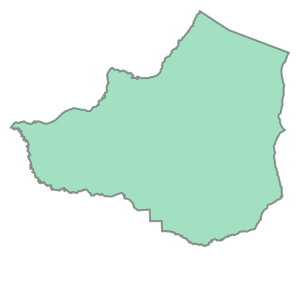

In [104]:
polygon = blkgrp_sedf.loc[2, "SHAPE"]  # the 2nd feature's geometry
polygon

Let's draw it on a map.

In [125]:
# a new `map` instance
map2 = gis.map()

# set up the map's layout
map2.layout.height = "300px"
map2.layout.display = "flex"
map2.layout.flex_flow = "column"

map2.content.draw(polygon)
map2

Map(extent={'type': 'extent', 'xmin': -17999999.99994758, 'ymin': -11999999.999921065, 'xmax': 17999999.999947…

```{note}
Codes below will grab the centroid of the polygon and use it to center the map above.
```

In [123]:
from arcgis.geometry import Point, SpatialReference

print(polygon.centroid)

point = Point({
    "x": polygon.centroid[0],
    "y": polygon.centroid[1],
    "spatialReference": blkgrp_sedf.spatial.sr
})

map2.content.draw(point)  # draw the centroid on the map

print(point.project_as(SpatialReference(4326)))  # lat, lon

map2.center = (
    point.project_as(SpatialReference(4326)).y, 
    point.project_as(SpatialReference(4326)).x
)
map2.zoom = 11

(564711.3058887311, 657628.5451212715)
{'x': -82.29181953367411, 'y': 29.915382438466743, 'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}


In [124]:
# cannot run in build
map2.export_to_html("../_static/map2.html")

True

In [122]:
from IPython.display import IFrame

# Adjust width and height as needed
IFrame(src="../_static/map2.html", width="100%", height="300px")

Now, let's enrich this polygon with the Age (5-year increments) in 2010.

In [130]:
# get the 18 variables
pop10_vars = usa_df.loc[
    contains_pop & category_5year & data_2010
]["analysisVariable"][:18].values
pop10_vars

array(['5yearincrements.POP0C10', '5yearincrements.POP5C10',
       '5yearincrements.POP10C10', '5yearincrements.POP15C10',
       '5yearincrements.POP20C10', '5yearincrements.POP25C10',
       '5yearincrements.POP30C10', '5yearincrements.POP35C10',
       '5yearincrements.POP40C10', '5yearincrements.POP45C10',
       '5yearincrements.POP50C10', '5yearincrements.POP55C10',
       '5yearincrements.POP60C10', '5yearincrements.POP65C10',
       '5yearincrements.POP70C10', '5yearincrements.POP75C10',
       '5yearincrements.POP80C10', '5yearincrements.POP85C10'],
      dtype=object)

In [134]:
polygon_pop10 = usa_data.enrich(
    study_areas=[polygon],
    enrich_variables=pop10_vars,
    return_geometry=False
)
polygon_pop10

source_country                                 aggregation_method  \
0            USA  BlockApportionment:US.BlockGroups;PointsLayer:...   

   population_to_polygon_size_rating  apportionment_confidence  has_data  \
0                              2.191                     2.576         1   

   pop0_c10  pop5_c10  pop10_c10  pop15_c10  pop20_c10  ...  pop40_c10  \
0        85        82         64         83         57  ...         87   

   pop45_c10  pop50_c10  pop55_c10  pop60_c10  pop65_c10  pop70_c10  \
0        134        106         79         79         90         56   

   pop75_c10  pop80_c10  pop85_c10  
0         48         17         21  

[1 rows x 23 columns]

**Amazing**! Now, let's try to create a plot to make sense of the data visually.

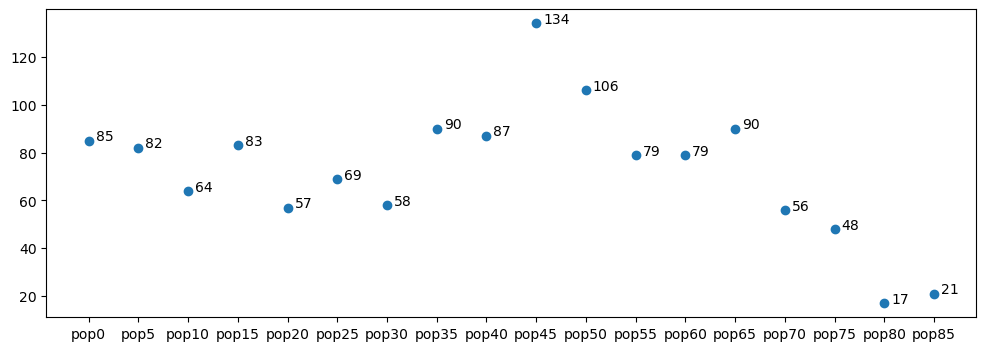

In [165]:
import matplotlib.pyplot as plt

enriched_columns = [
    var.split('.')[-1].lower().replace('c10', '_c10') 
    for var in pop10_vars
]
enriched_values = polygon_pop10.iloc[0][enriched_columns].values

# remove _c10 from column names
column_names = [var.split("_")[0] for var in enriched_columns]

fig, ax = plt.subplots(figsize=(12,4))
ax.scatter(column_names, enriched_values)

for i, txt in enumerate(enriched_values):
    ax.annotate(
        txt, 
        (column_names[i], enriched_values[i]),  
        xytext=(5, 0), 
        textcoords='offset points',
    )

Following is a full example on occupation, year built of house, and vehicle ownership.

In [166]:
# variables of interest
voi = pd.concat(
    [    
        usa_df.loc['occupation'][
            # all fields in occupation
            usa_df.loc['occupation']['fieldCategory'] == '2024 Labor Force (Esri)'
        ],
        usa_df[usa_df['analysisVariable'].isin(
            # variablers for year built and vehicle 
            ["yearbuilt.ACSTOTHU", "vehiclesavailable.ACSAVGVEH"]
        )],
    ]
)
voi

analysisVariable  \
dataCollectionID                                 
occupation               occupation.CIVLBFR_CY   
occupation               occupation.OCCBASE_CY   
occupation               occupation.OCCMGMT_CY   
occupation                occupation.OCCBUS_CY   
occupation               occupation.OCCCOMP_CY   
occupation               occupation.OCCARCH_CY   
occupation               occupation.OCCSSCI_CY   
occupation               occupation.OCCSSRV_CY   
occupation               occupation.OCCLEGL_CY   
occupation               occupation.OCCEDUC_CY   
occupation                occupation.OCCENT_CY   
occupation               occupation.OCCHTCH_CY   
occupation               occupation.OCCHLTH_CY   
occupation               occupation.OCCPROT_CY   
occupation               occupation.OCCFOOD_CY   
occupation               occupation.OCCBLDG_CY   
occupation               occupation.OCCPERS_CY   
occupation               occupation.OCCSALE_CY   
occupation               occupation.OCCADMN_CY   
occupation               occupation.OCCFARM_CY   
occupation               occupation.OCCCONS_CY   
occupation               occupation.OCCMAIN_CY   
occupation               occupation.OCCPROD_CY   
occupation               occupation.OCCTRAN_CY   
vehiclesavailable  vehiclesavailable.ACSAVGVEH   
yearbuilt                   yearbuilt.ACSTOTHU   

                                                        alias  \
dataCollectionID                                                
occupation                       2024 Civ Pop 16+/Labor Force   
occupation                       2024 Emp 16+ Occupation Base   
occupation                        2024 Occupation: Management   
occupation                2024 Occupation: Business/Financial   
occupation             2024 Occupation: Computer/Mathematical   
occupation             2024 Occupation: Architecture/Engineer   
occupation              2024 Occupation: Life/Social Sciences   
occupation                    2024 Occupation: Social Service   
occupation                             2024 Occupation: Legal   
occupation                 2024 Occupation: Education/Library   
occupation            2024 Occupation: Arts/Entertainment/Rec   
occupation                  2024 Occupation: Health Practices   
occupation                    2024 Occupation: Health Support   
occupation                2024 Occupation: Protective Service   
occupation                  2024 Occupation: Food Preparation   
occupation              2024 Occupation: Building Maintenance   
occupation                     2024 Occupation: Personal Care   
occupation                             2024 Occupation: Sales   
occupation                      2024 Occupation: Office/Admin   
occupation                2024 Occupation: Farm/Fish/Forestry   
occupation           2024 Occupation: Construction/Extraction   
occupation                2024 Occupation: Maintenance/Repair   
occupation                        2024 Occupation: Production   
occupation             2024 Occupation: Transportation/Moving   
vehiclesavailable  2022 Average Number of Vehicles (ACS 5-Yr)   
yearbuilt                 2022 Total Housing Units (ACS 5-Yr)   

                                                fieldCategory    vintage  
dataCollectionID                                                          
occupation                            2024 Labor Force (Esri)       2024  
occupation                            2024 Labor Force (Esri)       2024  
occupation                            2024 Labor Force (Esri)       2024  
occupation                            2024 Labor Force (Esri)       2024  
occupation                            2024 Labor Force (Esri)       2024  
occupation                            2024 Labor Force (Esri)       2024  
occupation                            2024 Labor Force (Esri)       2024  
occupation                            2024 Labor Force (Esri)       2024  
occupation                            2024 Labor Force (Es

In [ ]:
polygon_more_facts = usa_data.enrich(
    study_areas=[polygon],
    enrich_variables=list(voi['analysisVariable']),
    return_geometry=False
)
polygon_more_facts

source_country                                 aggregation_method  \
0            USA  BlockApportionment:US.BlockGroups;PointsLayer:...   

   population_to_polygon_size_rating  apportionment_confidence  has_data  \
0                              2.191                     2.576         1   

   civlbfr_cy  occbase_cy  occmgmt_cy  occbus_cy  occcomp_cy  ...  occpers_cy  \
0         494         458          16         17           9  ...           9   

   occsale_cy  occadmn_cy  occfarm_cy  occcons_cy  occmain_cy  occprod_cy  \
0          47          45           0          39          10           8   

   occtran_cy  acsavgveh  acstothu  
0          15        1.8       442  

[1 rows x 31 columns]

In [171]:
# add alias to the result
df = pd.concat(
    [
        polygon_more_facts.T[5:].reset_index(),
        voi.reset_index()['alias']
    ],
    axis=1
)

df.rename(columns={0: 'value'}, inplace=True)  # Rename '0' column to 'value'
# Reorder columns and drop index column
df[['alias', 'index', 'value']].drop("index", axis=1)  

alias value
0                 2024 Civ Pop 16+/Labor Force   494
1                 2024 Emp 16+ Occupation Base   458
2                  2024 Occupation: Management    16
3          2024 Occupation: Business/Financial    17
4       2024 Occupation: Computer/Mathematical     9
5       2024 Occupation: Architecture/Engineer     0
6        2024 Occupation: Life/Social Sciences     2
7              2024 Occupation: Social Service     2
8                       2024 Occupation: Legal     0
9           2024 Occupation: Education/Library    45
10     2024 Occupation: Arts/Entertainment/Rec     0
11           2024 Occupation: Health Practices   122
12             2024 Occupation: Health Support    15
13         2024 Occupation: Protective Service    16
14           2024 Occupation: Food Preparation     7
15       2024 Occupation: Building Maintenance    34
16              2024 Occupation: Personal Care     9
17                      2024 Occupation: Sales    47
18               2024 Occupation: Office/Admin    45
19         2024 Occupation: Farm/Fish/Forestry     0
20    2024 Occupation: Construction/Extraction    39
21         2024 Occupation: Maintenance/Repair    10
22                 2024 Occupation: Production     8
23      2024 Occupation: Transportation/Moving    15
24  2022 Average Number of Vehicles (ACS 5-Yr)   1.8
25         2022 Total Housing Units (ACS 5-Yr)   442